0.13218160322129116
1.4309633105043644


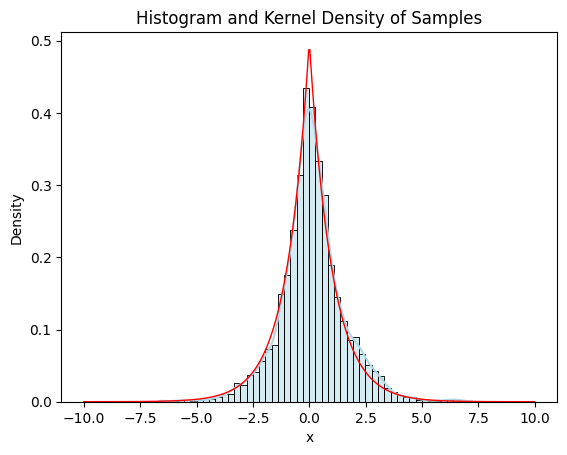

Rhat value for s = 0.001: 58.692775182324446
58.692775182324446


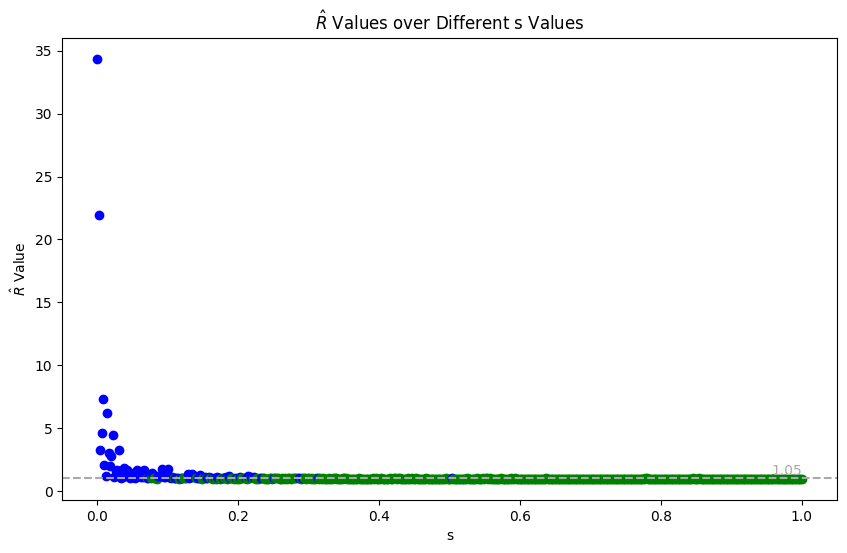

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seed for reproducibility
np.random.seed(123)

# Define the Probability Density Function
def f(x):
    return 0.5 * np.exp(-np.abs(x))

# Metropolis-Hastings Algorithm
def metropolis_hastings(N, s, x0):
    samples = np.zeros(N)
    samples[0] = x0

    for i in range(1, N):
        x_star = np.random.normal(loc=samples[i-1], scale=s)
        r = f(x_star) / f(samples[i-1])
        u = np.random.uniform()

        if np.log(u) < np.log(r):
            samples[i] = x_star
        else:
            samples[i] = samples[i-1]

    return samples

# Generate samples
N = 10000
s = 1
x0 = 0
samples = metropolis_hastings(N, s, x0)

# Calculate sample mean and standard deviation
sample_mean = np.mean(samples)
sample_sd = np.std(samples)

print(sample_mean)
print(sample_sd)

# Create histogram and density plot
sns.histplot(samples, bins=50, kde=True, stat='density', color='lightblue')
sns.lineplot(x=np.linspace(-10, 10, 400), y=f(np.linspace(-10, 10, 400)), color='red', linewidth=1)
plt.title('Histogram and Kernel Density of Samples')
plt.xlabel('x')
plt.ylabel('Density')
plt.show()

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seed for reproducibility
np.random.seed(123)

# Define the Probability Density Function
def f(x):
    return 0.5 * np.exp(-np.abs(x))

# Metropolis-Hastings Algorithm
def metropolis_hastings(N, s, x0):
    samples = np.zeros(N)
    samples[0] = x0

    for i in range(1, N):
        x_star = np.random.normal(loc=samples[i-1], scale=s)
        r = f(x_star) / f(samples[i-1])
        u = np.random.uniform()

        if np.log(u) < np.log(r):
            samples[i] = x_star
        else:
            samples[i] = samples[i-1]

    return samples

# Function to calculate Rhat
def calculate_rb(N, s, J):
    chains = []
    initial_values = np.random.normal(size=J)

    for j in range(J):
        chains.append(metropolis_hastings(N, s, initial_values[j]))

    Mjs = np.mean(chains, axis=1)
    Vjs = np.var(chains, axis=1)

    W = np.mean(Vjs)
    M = np.mean(Mjs)
    B = np.sum((Mjs - M)**2) / J

    Rb = np.sqrt((B + W) / W)

    return Rb

# Parameters
N = 2000
J = 4

# Calculate Rhat for s = 0.001
s = 0.001
Rb_specific = calculate_rb(N, s, J)

print(f"Rhat value for s = 0.001: {Rb_specific}")

# Calculate Rhat over a grid of s values
s_values = np.linspace(0.001, 1, 500)
Rb_values = [calculate_rb(N, s, J) for s in s_values]

# Create a data frame for plotting
plot_data = np.vstack((s_values, Rb_values)).T
colors = np.where(plot_data[:, 1] <= 1.05, 'green', 'blue')

# Plot Rhat values
plt.figure(figsize=(10, 6))
for i, (s, Rb) in enumerate(plot_data):
    plt.plot(s, Rb, 'o', color=colors[i])
plt.axhline(1.05, color='darkgrey', linestyle='dashed')
plt.text(max(s_values), 1.05, '1.05', verticalalignment='bottom', horizontalalignment='right', color='darkgrey')
plt.title(r'$\hat{R}$ Values over Different s Values')
plt.xlabel('s')
plt.ylabel(r'$\hat{R}$ Value')
plt.show()
